In [1]:
import matplotlib
%matplotlib inline
import matplotlib.pylab as plt
from matplotlib.colors import LogNorm, ListedColormap
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.gridspec import GridSpec
import os


import yt
from yt import YTArray, YTQuantity
import trident
import numpy as np
import sys
import h5py as h5
import pickle
from astropy.io import fits


import seaborn as sns
import palettable
sns.set_style("ticks",{'axes.grid': True, 'grid.linestyle': '--'})

sys.path.append('../analysis')
import spectrum_generating_tools as spg
import spectrum_analysis_tools as spa
import ion_plot_definitions as ipd
import plotting_tools as pt



/Users/irynabutsky/software/yt/yt/utilities/logger.py:4: VisibleDeprecationWarning: The configuration file /Users/irynabutsky/.config/yt/ytrc is deprecated in favor of /Users/irynabutsky/.config/yt/yt.toml. Currently, both are present. Please manually remove the deprecated one to silence this warning.
Deprecated since v4.0.0 . This feature will be removed in v4.1.0
  from yt.config import ytcfg


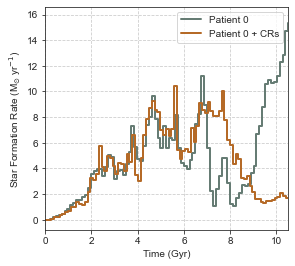

In [2]:
# star formation history plot

#load data
f = h5.File('../../data/simulation_data/sfh_data.h5', 'r')

fig, ax = plt.subplots(figsize = (4.2, 3.8))
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Star Formation Rate (M$_{\odot}$ yr$^{-1}$)')
ax.set_xlim(0, 10.5)


color_list = palettable.wesanderson.Moonrise2_4.mpl_colors[:2]
for model, label, color in zip(['p0', 'agncr'], ['Patient 0', 'Patient 0 + CRs'], color_list):
     
    x = np.array(f['time_%s'%model])
    y = np.array(f['sfh_%s'%model])
    
    x = np.vstack((x[:-1], x[1:])).reshape((-1), order = 'F')
    y = np.vstack((y, y)).reshape((-1), order = 'F')

    ax.plot(x, y, linewidth = 2, label = label, color = color)

ax.legend()
fig.tight_layout()
plt.savefig('../../plots/sfh.png', dpi = 300)


yt : [INFO     ] 2021-04-06 14:44:40,316 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-04-06 14:44:40,316 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-04-06 14:44:40,317 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-04-06 14:44:40,318 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-04-06 14:44:40,318 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-04-06 14:44:40,319 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-04-06 14:44:40,320 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-06 14:44:40,320 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-06 14:44:40,321 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-06 14:44:40,321 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-06 14:44:40,338 Allocating for 3.151e+07 p

0.0 2.603813218517925


yt : [INFO     ] 2021-04-06 14:44:43,593 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-04-06 14:44:43,594 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-04-06 14:44:43,595 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-04-06 14:44:43,595 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-04-06 14:44:43,596 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-04-06 14:44:43,596 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-04-06 14:44:43,597 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-06 14:44:43,598 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-06 14:44:43,598 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-06 14:44:43,599 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-06 14:44:43,620 Allocating for 3.151e+07 p

0.0 17.056485188054058


yt : [INFO     ] 2021-04-06 14:44:46,621 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-04-06 14:44:46,622 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-04-06 14:44:46,622 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-04-06 14:44:46,623 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-04-06 14:44:46,624 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-04-06 14:44:46,624 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-04-06 14:44:46,625 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-06 14:44:46,625 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-06 14:44:46,626 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-06 14:44:46,627 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-06 14:44:46,642 Allocating for 3.151e+07 p

0.0 12.820702755292926


yt : [INFO     ] 2021-04-06 14:44:49,801 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-04-06 14:44:49,802 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-04-06 14:44:49,803 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-04-06 14:44:49,803 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-04-06 14:44:49,804 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-04-06 14:44:49,804 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-04-06 14:44:49,805 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-06 14:44:49,805 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-06 14:44:49,805 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-06 14:44:49,806 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-06 14:44:49,816 Allocating for 1.506e+06 p

0.0 8.999737864908283


yt : [INFO     ] 2021-04-06 14:44:52,718 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-04-06 14:44:52,719 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-04-06 14:44:52,720 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-04-06 14:44:52,721 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-04-06 14:44:52,721 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-04-06 14:44:52,722 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-04-06 14:44:52,722 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-06 14:44:52,723 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-06 14:44:52,723 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-06 14:44:52,724 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-06 14:44:52,732 Allocating for 1.506e+06 p

0.0 35.63122147811926


yt : [INFO     ] 2021-04-06 14:44:55,484 Parameters: current_time              = 3.398869692888919e+17 s
yt : [INFO     ] 2021-04-06 14:44:55,484 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-04-06 14:44:55,485 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-04-06 14:44:55,486 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-04-06 14:44:55,486 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-04-06 14:44:55,487 Parameters: current_redshift          = 0.24979488244391623
yt : [INFO     ] 2021-04-06 14:44:55,487 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-06 14:44:55,488 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-06 14:44:55,488 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-06 14:44:55,488 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-06 14:44:55,498 Allocating for 1.506e+06 p

0.0 43.375265488358735


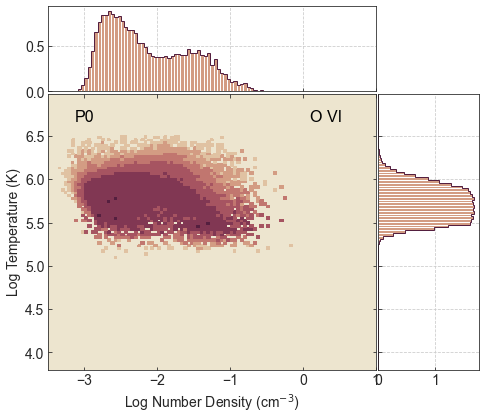

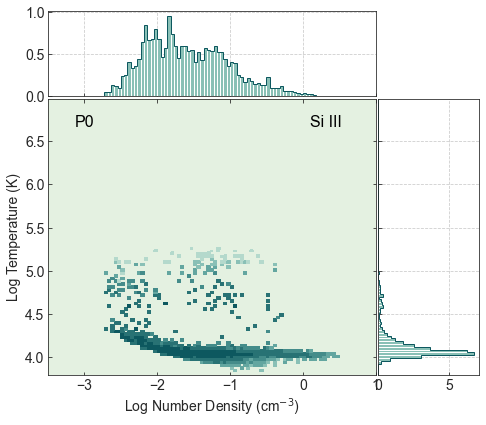

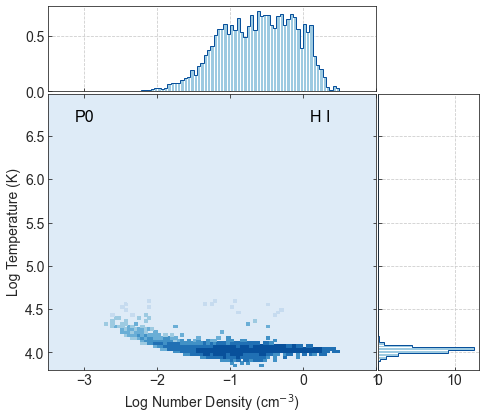

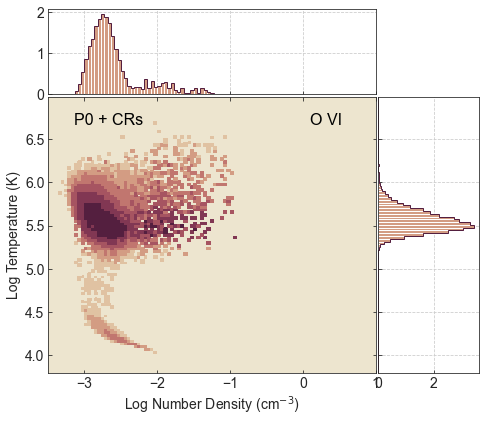

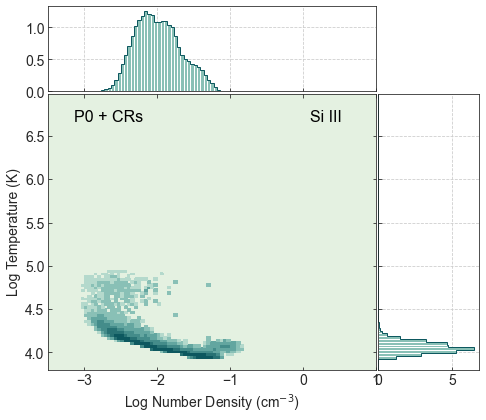

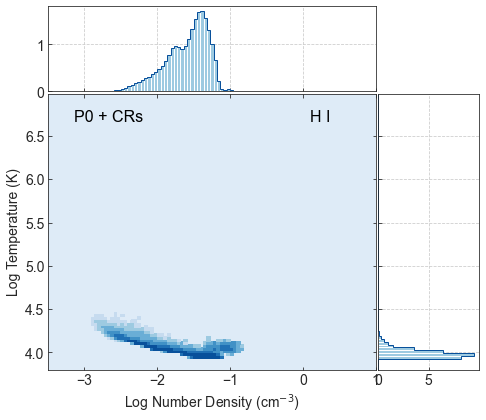

In [4]:

def plot_phase(model, ion = 'O VI', xfield = 'number_density', yfield = 'temperature'):
    
    ds, gcenter, bv = spg.load_simulation_properties(model)    
    sp1 = ds.sphere(gcenter, (10, 'kpc'))
    sp2 = ds.sphere(gcenter, (50, 'kpc'))
    sp = sp2 - sp1

    logx_list = np.log10(sp[xfield])
    logy_list = np.log10(sp[yfield])
    
    ion_name = ipd.return_ion_prefix(ion)
    mass_list = sp['%s_mass'%ion_name].in_units('Msun')


    xlims = (-3.5, 1)
    ylims = (3.8, 6.99)
    xrange = xlims[1] - xlims[0]
    yrange = ylims[1] - ylims[0]

    xedges = np.linspace(xlims[0], xlims[1], 100)
    yedges = np.linspace(ylims[0], ylims[1], 100)
    weights = mass_list
    normed = True
    #weights = None
   # print(logx_list.min(), logx_list.max())
    H, xedges, yedges = np.histogram2d(logx_list, logy_list, bins = (xedges, yedges), weights = weights, density = normed)
    H = H.T
    X, Y = np.meshgrid(xedges, yedges)
  #  print(H)

    # definitions for the axes
    left, width = 0.12, 0.65
    bottom, height = 0.11, 0.65
    spacing = 0.005
    rect_scatter = [left, bottom, width, height]
    rect_histx = [left, bottom + height + spacing, width, 0.2]
    rect_histy = [left + width + spacing, bottom, 0.2, height]

    fig = plt.figure(figsize=(7, 5.9))
    fs = 14
    ax_scatter = plt.axes(rect_scatter)
    ax_scatter.tick_params(direction='in', top=True, right=True, labelsize = fs)
    ax_histx = plt.axes(rect_histx)
    ax_histx.tick_params(direction='in', labelbottom=False, labelsize = fs)
    ax_histy = plt.axes(rect_histy)
    ax_histy.tick_params(direction='in', labelleft=False, labelsize = fs)
    
   # cbar_dimensions = (0.1*xrange + xlims[0], 0.3*yrange + ylims[0], 0.9*xrange, 0.05*yrange)
   # cbax = inset_axes(ax_scatter, width = "90%", height = "5%", loc = 8)

    ax_scatter.set_xlim(xlims[0], xlims[1])
    ax_scatter.set_ylim(ylims[0], ylims[1])
    ax_histx.set_xlim(ax_scatter.get_xlim())
    ax_histy.set_ylim(ax_scatter.get_ylim())


    ax_scatter.set_xlabel('Log Number Density (cm$^{-3}$)', fontsize = fs)
    ax_scatter.set_ylabel('Log Temperature (K)', fontsize = fs)

   # palette = sns.color_palette("Blues")
#    cmap = cmListedColormap(palette)
    palette = pt.get_palette(ion)
    cmap = ListedColormap(palette)
    background = palette[0]

    print(H.min(), H.max())
    im = ax_scatter.pcolormesh(X, Y, H, norm = LogNorm(), vmin = 1e-4, vmax = 10, cmap = cmap)
    ax_scatter.set_facecolor(background)
   # cbar = fig.colorbar(im, cax=cbax, orientation = 'horizontal')
   # cbar.ax.set_title('Ion Mass Probability Density')
   # cbar.ax.xaxis.set_ticks_position('top')


    # add ion and model labels
    xtext = 0.8*(xlims[1] - xlims[0]) + xlims[0]
    ytext = 0.9*(ylims[1] - ylims[0]) + ylims[0]
    ax_scatter.text(xtext, ytext, ion, fontsize = fs+2, color = 'black')
    
    xtext = 0.08*(xlims[1] - xlims[0]) + xlims[0]
    if model == 'P0':
        ax_scatter.text(xtext, ytext, model, fontsize = fs+2, color = 'black')
    else:
        ax_scatter.text(xtext, ytext, 'P0 + CRs', fontsize = fs+2, color = 'black')


    
    ax_histx.hist(logx_list, bins=xedges, weights = weights, density = normed, color = palette[2])
    ax_histx.hist(logx_list, bins=xedges, weights = weights, density = normed, 
                  histtype = 'step', color = palette[-1])
    ax_histy.hist(logy_list, bins=yedges, weights = weights, density = normed, 
                  orientation = 'horizontal', color = palette[2])
    ax_histy.hist(logy_list, bins=yedges, weights = weights, density = normed, 
                  orientation = 'horizontal', histtype = 'step', color = palette[-1])


    ion = ion.replace(" ", "")
    plt.savefig('../../plots/phase_%s_%s_zoom.png'%(ion, model), dpi = 300)

    
model_list = ['P0', 'P0_agncr']
ion_list = ['O VI', 'Si III', 'H I']

#ion_list = ['H I']

for model in model_list:
    for ion in ion_list:
        plot_phase(model, ion)

In [131]:


def add_werk_data(ax, xfield='impact', yfield = 'col', ion = 'OVI', b_cutoff = 40, v_cutoff = 35):
    
    # load werk data
    hdul = fits.open('../../data/OVIcomponents_withprofsANDCIV.fits')
    data = hdul[1].data
    if ion == 'OVI':
        col = data['NCOMP']
        colerr = data['NCOMPERR']
        bval = data['BVAL']
        bvalerr = data['BVALERR']
        vel = data['VCEN']
        velerr = data['VCENERR']
    else:
        ion = '%sMATCH'%ion.upper()
        flag =  data[ion][:, 6]
        mask = flag < 3
        col = data[ion][:, 0][mask]
        colerr = data[ion][:, 1][mask]
        bval = data[ion][:, 2][mask]
        bvalerr = data[ion][:, 3][mask]
        vel = data[ion][:, 4][mask]
        velerr = data[ion][:, 5][mask]
    werk_impact = data['RHO']
    si_flag_for_ovi = data['SIIIIMATCH'][:, 6]
    v_ovi = data['VCEN']
    v_ovi_err = data['VCENERR']
    v_si = data['SIIIIMATCH'][:, 4]
    v_si_err = data['SIIIIMATCH'][:, 5]
    
    if xfield == 'bval':
        x_list = bval
#        xerr_list = np.log10(b_list + berr_list) - np.log10(b_list - berr_list)
        xerr_list = bvalerr
    elif xfield == 'impact':
        x_list = werk_impact
        xerr_list = np.zeros(len(werk_impact)) # are there errors on impact??
    elif xfield == 'dvel':
        x_list = np.abs(v_ovi - v_si)
      #  print(x_list, v_si)
       # yerr = np.sqrt(v_ovi_err**2 + v_si_err**2)
       ## yerr_lower = y_list - y_err
        #yerr_upper = y_list + y_err
    if yfield == 'col':
        y_list = np.power(10, col)
        yerr_lower = np.power(10, col - colerr)
        yerr_upper = np.power(10, col + colerr)
    elif yfield == 'bval':
        y_list = bval
        yerr_lower = bval - bvalerr
        yerr_upper = bval + bvalerr
    elif yfield == 'vel':
        y_list = vel
        yerr_lower = vel - velerr
        yerr_upper = vel + velerr
        
    
    if xfield == 'dvel' and ion == 'OVI':
        mask = si_flag_for_ovi < 3
        x_list = x_list[mask]
        y_list = y_list[mask]
        
    for i in range(len(col)): #note the markers don't work for field = dvel
        dvel = np.abs(v_ovi[i] - v_si[i])
        if ion == 'OVI' and (si_flag_for_ovi[i] == 3 or dvel > v_cutoff):
                marker = 'd'
        elif bval[i] > b_cutoff: #broad
            marker = 's'
        else:
            marker = 'o'
        
        if i == 0:
            label = 'Werk et al. 2016'
        else:
            label = None
  
        if werk_impact[i] < 10000:
            #ax.errorbar(x_list[i], y_list[i], xerr = xerr_list[i], yerr = np.array([[yerr_lower, yerr_upper]]).T, 
             #           linewidth = 0.5, fmt='ko', color = 'black', linestyle = '', alpha = 0.2, zorder = 10)
            ax.vlines(x_list[i], yerr_lower[i], yerr_upper[i], linewidth = 0.5, color = 'black', alpha = 0.2, zorder = 10)
            ax.scatter(x_list[i], y_list[i], marker = marker, color = 'black', s =23, label = label, zorder = 10)
     #   ax.legend()

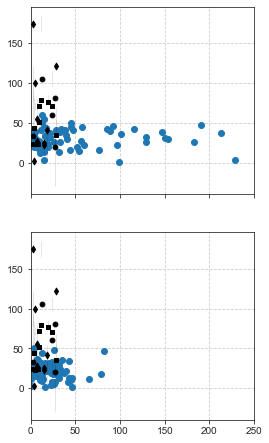

In [85]:
ion = 'OVI'
b_cutoff = 40
v_cutoff = 35
ion_list, logN_list, logNerr_list, b_list, berr_list, vel_list, vel_err_list, \
            ray_id_list, model_list, impact_list, ovi_label_list, detection_list, align_list \
            = pt.load_csv_data(b_cutoff = b_cutoff, v_cutoff = v_cutoff)
if ion == 'OVI':
    dvel_list = pt.calculate_min_dvel(ion, 'SiIII')
elif ion == 'SiIII':
    dvel_list = pt.calculate_min_dvel(ion, 'OVI')
    

fig, ax = plt.subplots(nrows = 2, figsize = (4, 7.6), sharex = True, sharey = True)    
ax[0].set_xlim(0, 250)
#ax[0].set_yscale('log')
#ax[0].set_xscale('log')
#ax[0].set_ylim(3e12, 1e16)
for i,model in enumerate(['P0', 'P0agncr']):
    mask = (ion_list == ion) & (model_list == model) 
    #ax[i].scatter(dvel_list[mask], np.power(10, logN_list[mask]))
    ax[i].scatter(dvel_list[mask], b_list[mask])
    add_werk_data(ax[i], xfield='dvel', yfield = 'bval', ion = 'OVI')


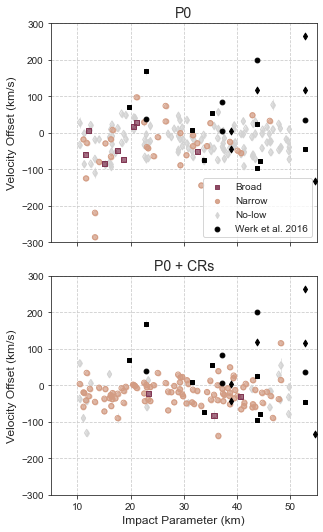

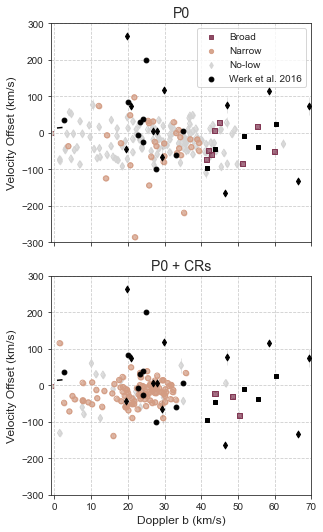

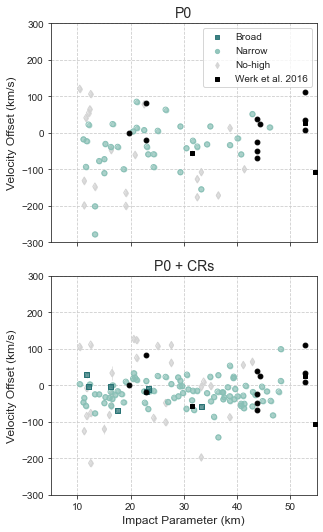

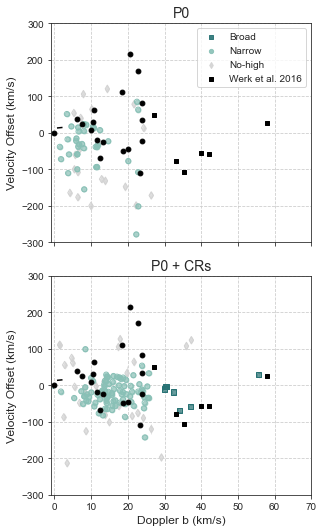

In [136]:


# plotting O VI label plots
def plot_ovi(xfield, yfield = 'col', impact_min = 0, ion = 'OVI', impact_max = 500, add_sim = False,
             b_cutoff = 40, v_cutoff = 35):
    ion_list, logN_list, logNerr_list, b_list, berr_list, vel_list, vel_err_list, \
                ray_id_list, model_list, impact_list, ovi_label_list, detection_list, align_list \
                = pt.load_csv_data(b_cutoff = b_cutoff, v_cutoff = v_cutoff)
    if ion == 'OVI':
        dvel_list = pt.calculate_min_dvel(ion, 'SiIII')
    elif ion == 'SiIII':
        dvel_list = pt.calculate_min_dvel(ion, 'OVI')
        b_cutoff = 27
        
    if xfield == 'bval':
        x_list = b_list
#        xerr_list = np.log10(b_list + berr_list) - np.log10(b_list - berr_list)
        xerr_list = berr_list
        xlims = (-1, 70) 
        xlabel = 'Doppler b (km/s)'
    elif xfield == 'impact':
        x_list = impact_list
        xerr_list = np.zeros(len(impact_list))
        xlims = (5, 55)#150)
        xlabel = 'Impact Parameter (km)'
    if yfield == 'col':
        y_list = np.power(10, logN_list)
       # logNerr_list[logNerr_list > .1] = 0
        yerr_upper = np.power(10, logN_list + logNerr_list) 
        yerr_lower = np.power(10, logN_list - logNerr_list)
        
        ylims = (1e12, 1e16)
        if ion == 'SiIII':
            ylims = (3e11, 3e16)
        ylabel = '%s Column Density (cm$^{-2}$)'%ion
        yscale = 'log'
    elif yfield == 'bval':
        y_list = b_list
        yerr_upper = b_list + berr_list
        yerr_lower = b_list - berr_list
        ylims = (-1, 70) 
        ylabel = 'Doppler b (km/s)'
        yscale = 'linear'
    elif yfield == 'vel':
        y_list = vel_list
        yerr_upper = vel_list + vel_err_list
        yerr_lower = vel_list - vel_err_list
        ylims = (-300, 300)
        ylabel = 'Velocity Offset (km/s)'
        yscale = 'linear'
    
    
    fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (4.6, 7.5), sharex = True, sharey = True)
    if xfield == 'bval':
        for a in ax:
            a.plot([0.7, 2.7], [13.5, 15.5], color = 'black', linestyle = 'dashed')
    label_list = ['broad', 'narrow', 'nolow']
    if ion == 'OVI':
        legend_list = ['Broad', 'Narrow', 'No-low']
    else:
        legend_list = ['Broad', 'Narrow', 'No-high']
    marker_list = ['s', 'o', 'd']
    zorder_list = [4, 3, 2]
    color_list = [palettable.wesanderson.Moonrise2_4.mpl_colors[0], palettable.wesanderson.Moonrise2_4.mpl_colors[1], 
                  palettable.wesanderson.Darjeeling4_5.mpl_colors[1]]
    
   # if ion == 'OVI':
    pal =  pt.get_palette(ion)
    color_list = [pal[5], pal[2], 'lightgray']#palettable.cartocolors.qualitative.Antique_3.mpl_colors[0]]
        
    for col, model in enumerate(['P0', 'P0agncr']):
        if add_sim and xfield == 'impact' and yfield == 'col':
            fn = '../../data/simulated_ion_column_densities_%s.h5'%(model)
            if model == 'P0agncr':
                fn = '../../data/simulated_ion_column_densities_P0_agncr.h5'
            r_arr, cdens_arr = ipd.load_r_cdens(fn, ion)
            rmax = xlims[1]
            cmap = palettable.cmocean.sequential.Gray_18_r.mpl_colormap
            im =  ipd.plot_hist2d(ax[col], r_arr, cdens_arr, rmax, ylims, vmin = 1e-2, vmax = 1e5, cmap = cmap)

          #  ax[col].scatter(werk_impact, np.power(10, werk_ovi_col), marker = 'd', color = 'black', s =16)
        
        # add werk et al. 2016 data
        #add_werk_data(ax[col], xfield=xfield, yfield = yfield, ion = ion)
        
        if ion == 'None':
            for i, label in enumerate(label_list):
                mask = (ion_list == ion) & (model_list == model) & (ovi_label_list == label) & (ray_id_list < 100)

               # total_ovi = pt.get_total_column(ray_id_list[mask], logN_list[mask])
              #  ax[col].scatter(x_list[mask], np.power(10, total_ovi), color = 'black', s = 23, zorder = 10)                                            

               # ax.scatter(np.log10(b_list[mask]), logN_list[mask], label = legend_list[i])
                ax[col].errorbar(x_list[mask], y_list[mask], xerr=xerr_list[mask], yerr=yerr_list[mask], linewidth = 0.5, 
                                 color = 'black', alpha = 0.2, zorder = 1)
                ax[col].scatter(x_list[mask], y_list[mask], s = 26, marker = marker_list[i], 
                           edgecolor = color_list[i], color = 'None', zorder= zorder_list[i])
                align_mask = mask# & (align_list == 1)
                ax[col].scatter(x_list[align_mask], np.power(10, logN_list[align_mask]), s = 23, marker = marker_list[i], 
                           color = color_list[i], zorder= zorder_list[i], alpha = 0.9)
                # dummy for legend
                ax[col].scatter(-1, -1, s = 18, marker = marker_list[i], 
                           color = color_list[i], label = legend_list[i], alpha = 0.9)
        else:
            mask = (ion_list == ion) & (model_list == model) & (detection_list == 'detection') & (ray_id_list < 100)
            narrow_mask = mask & (b_list < b_cutoff) & (dvel_list <= v_cutoff)
            broad_mask = mask & (b_list >= b_cutoff) & (dvel_list <= v_cutoff)
            no_match_mask = mask & (dvel_list > v_cutoff)
            for i, mask in enumerate([broad_mask, narrow_mask, no_match_mask]):
                ax[col].vlines(x_list[mask], yerr_lower[mask], yerr_upper[mask], linewidth = 0.5, 
                                 color = 'black',  alpha = 0.2, zorder = 1)
                ax[col].scatter(x_list[mask], y_list[mask], s = 26, marker = marker_list[i], 
                           edgecolor = color_list[i], color = 'None', zorder= zorder_list[i])
                align_mask = mask #& (dvel_list < 35)#(align_list == 1)
                ax[col].scatter(x_list[align_mask], y_list[align_mask], s = 23, marker = marker_list[i], 
                           color = color_list[i], zorder= zorder_list[i], alpha = 0.7)
                # dummy for legend
                ax[col].scatter(-1, -1, s = 18, marker = marker_list[i], 
                           color = color_list[i], label = legend_list[i], alpha = 0.9)
        add_werk_data(ax[col], xfield=xfield, yfield = yfield, ion = ion, b_cutoff = b_cutoff, v_cutoff = v_cutoff)

                
        ax[col].set_ylabel(ylabel, fontsize = 12)
        ax[col].set_yscale(yscale)
     
    
    ax[0].set_xlim(xlims)#0.7, 2)
    ax[0].set_ylim(ylims)
    ax[1].set_xlabel(xlabel, fontsize = 12)

    
   # xtext = 0.08*(xlims[1] - xlims[0]) + xlims[0]
    #ytext = 0.5*(ylims[1] - ylims[0]) + ylims[0]
    #ax[0].text(xtext, ytext, 'P0', fontsize = 14, color = 'black')
    #ax[1].text(xtext, ytext, 'P0 + CRs', fontsize = 14, color = 'black')
    ax[0].set_title('P0', fontsize = 14)
    ax[1].set_title('P0 + CRs', fontsize = 14)
    
    ax[0].legend()
    fig.tight_layout()
    plt.savefig('../../plots/%s_%s_%s.png'%(ion, xfield, yfield), dpi = 300)

#impact_min = 0
#impact_max = 300
for ion in ['OVI', 'SiIII']:
    #plot_ovi('bval', ion = ion)
   # plot_ovi('impact', ion = ion)
    plot_ovi('impact', yfield = 'vel', ion = ion)
    plot_ovi('bval', yfield = 'vel', ion = ion)

#plot_ovi('impact', yfield = 'bval')

P0_agncr
69
ERROR NO VPMODEL FITS FILE
P0_agncr
69
ERROR NO VPMODEL FITS FILE


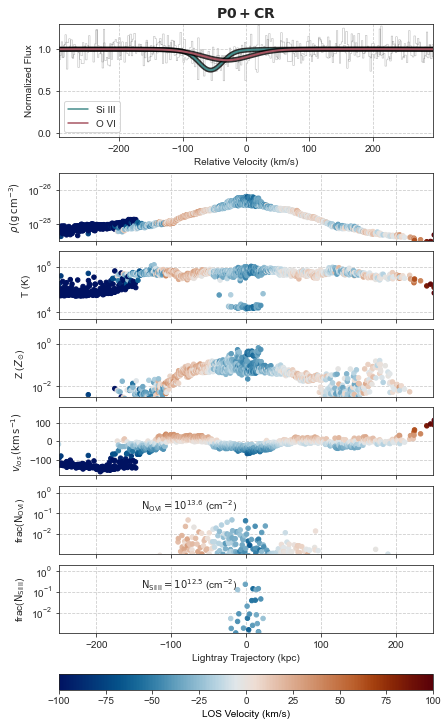

In [328]:


def plot_ion_fit(model, ray_id, ax = None, ion_list = ['Si III', 'O VI'], 
                 data_loc = '../../data/unanalyzed_spectra'):
   # color_list = ['purple', 'cornflowerblue', 'orange']

    spec = 'COS-FUV_%s_z0.25_%04d'%(model, ray_id)
    if model == 'P0_agncr':
        model = 'P0agncr'

    fit_file  = '../../data/analyzed_spectra/synth_%s%04d_eval.pickle'%(model, ray_id)
    if not os.path.isfile(fit_file):
        return
    fit_data = pickle.load( open(fit_file, 'rb'))


    if ax is None:
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(3.8, 2.2))

    for ion in ion_list:
        vv, flux, vvfit, fluxfit,  wl, wlfit, w0 = spa.load_velocity_data(ion, spec, 
                                            unanalyzed = True, work_dir = data_loc)
        new_v = np.ravel(np.column_stack((vv, vv)))
        new_f = np.ravel(np.column_stack((flux, flux)))
        ax.plot(new_v[1:], new_f[:-1], color = 'black',linewidth = 0.5, alpha = 0.3, zorder = 0)
    
        color = pt.get_palette(ion)[4]
        for fit in fit_data:
            wl = fit['wavelength']
            fluxfit = fit['full']
            vvfit = pt.convert_to_vel(wl, w0)

            ax.plot(vvfit, fluxfit, color = 'black', linewidth = 5, alpha = 0.8)
            ax.plot(vvfit, fluxfit, color = color, linewidth = 2, alpha = 1)

        # just for the label
        ax.plot(vvfit, -100*fluxfit, color = color, label = ion)
            
    ax.set_xlim(-295, 295)
    
    ax.set_ylim(-0.05, 1.3)
    ax.set_xlabel('Relative Velocity (km/s)')
    ax.set_ylabel('Normalized Flux')
    ax.legend()


def load_sightline_data(sim, ray_id, csv_data_file = '../../data/analyzed_spectra/merged_solutions_with_kinematics.csv'):
    if sim == 'P0_agncr':
        sim = 'P0agncr'
        
    ion_list, logN_list, logNerr_list, b_list, berr_list, vel_list, \
                vel_err_list, ray_id_list, model_list, impact_list, ovi_label_list, detection_list, align_list\
                = pt.load_csv_data(csv_data_file)
    mask = (model_list == sim) & (ray_id_list == ray_id)
    
    impact_parameter = impact_list[mask]
    if len(impact_parameter) > 0:
        impact_parameter = impact_parameter[0]
    
    ovi_label = 'none'
    si_mask = mask & (ion_list == 'SiIII')
    ovi_mask = mask & (ion_list == 'OVI')

    log_total_si_col = np.log10(np.sum(np.power(10, logN_list[si_mask])))
    log_total_ovi_col = np.log10(np.sum(np.power(10, logN_list[ovi_mask])))

    return impact_parameter, log_total_si_col, log_total_ovi_col
    
    
def plot_sightline_data(sim, ray_id, output = 3195):
    l, temperature, density, metallicity, vlos, ocol, sicol = \
        pt.load_sightline_scatter_data(sim, ray_id, output = output)
    l -= 250

    sim_ovi_col = np.sum(ocol)
    sim_si_col = np.sum(sicol)
    
    ocol_frac = ocol / sim_ovi_col
    si_frac = sicol / sim_si_col
    
    field_list = [density, temperature, metallicity, vlos, ocol_frac, si_frac]
    ylim_list = [(1e-29, 1e-25), (5e3, 5e6), (3e-3, 5), (-185, 185), (1e-3, 2), (1e-3, 2)]#(1e10, 3e14), (1e10, 3e14)]  
    ytick_list = [(1e-28, 1e-26), (1e4, 1e6), (1e-2, 1), (-100, 0, 100), (1e-2, 1e-1, 1), (1e-2, 1e-1, 1)]#, .50, .75), (.25, .50, .75)]#(1e11, 1e13)]

    ylabel_list = ['$\\rho\, ({\\rm g}\, {\\rm cm}^{-3})$', 'T (K)', 'Z ($Z_{\odot}$)', 
                   '$v_{los}\, ({\\rm km}\, {\\rm s}^{-1})$',
                   'frac(${\\rm N}_{\\rm OVI}$)',  'frac(${\\rm N}_{\\rm SiIII}$)']
                  # '${\\rm N}_{\\rm OVI} / \sum {\\rm N}_{\\rm OVI}$', 
                  # '${\\rm N}_{\\rm SiIII} / \sum {\\rm N}_{\\rm SiIII}$']

                  # '${\\rm N}_{\\rm OVI}$ (cm$^{-2}$)', '${\\rm N}_{\\rm SiIII}$ (cm$^{-2}$)']
    ion_list = ['OVI', 'SiIII']
    cmap = pt.get_cmap('velocity')
    nrows = 6
   # fig, ax = plt.subplots(nrows = nrows, ncols = 1 , figsize = (6, len(field_list)),
   #                            sharex=True, sharey=False)
    fig = plt.figure(figsize = (6, 10), constrained_layout=True)

    gs = GridSpec(25, 4, figure=fig)
    start = 5
    ax0 = fig.add_subplot(gs[:start, :])
    ax_temp = fig.add_subplot(gs[-2, :])
    ax_temp.axis('off')
    cbax = inset_axes(ax_temp, width = "100%", height = "70%", loc = 9)
    
    ax1 = fig.add_subplot(gs[0+start:3+start, :])
    ax2 = fig.add_subplot(gs[3+start:6+start, :])
    ax3 = fig.add_subplot(gs[6+start:9+start, :])
    ax4 = fig.add_subplot(gs[9+start:12+start, :])
    ax5 = fig.add_subplot(gs[12+start:15+start, :])
    ax6 = fig.add_subplot(gs[15+start:18+start, :])
    
    
    plot_ion_fit(sim, ray_id, ax = ax0)
    ax = [ax1, ax2, ax3, ax4, ax5, ax6]
    
    for i in range(len(field_list)):
        row = i
        vmin = -100
        vmax = 100 #85
        
        data = field_list[i]
        im = ax[row].scatter(l, data, c = vlos, s = 20, cmap = cmap, vmin = vmin, vmax = vmax)
        ax[row].set_xlim(-250, 250)        
        if i != 3: # los velocity
            ax[row].set_yscale('log')
        if i < len(field_list)-1:
            ax[i].set_xticklabels([])
        ylims = ylim_list[row]
        ax[row].set_ylim(ylims[0], ylims[1])
        ax[row].set_ylabel(ylabel_list[row])
        ax[row].set_yticks(ytick_list[i])
        
    ax[-1].set_xlabel('Lightray Trajectory (kpc)')
    
    cbar = fig.colorbar(im, cax=cbax, orientation = 'horizontal')
    cbar.ax.set_xlabel('LOS Velocity (km/s)',  color = 'black')
    #fig.tight_layout()
    #fig.subplots_adjust(hspace = 0.1)
    
    impact, sicol, ocol = load_sightline_data(sim, ray_id)
    if sim == 'P0_agncr':
        ax0.set_title('$\\rm \\bf P0+CR$', fontsize = 14)
    else:
        ax0.set_title('$\\rm \\bf P0$', fontsize = 14)
        
    ax6.text(-140, 0.15, '${\\rm N}_{\\rm SiIII} = 10^{%.1f}$ (cm$^{-2}$)'%np.log10(sim_si_col))#,
#             backgroundcolor = 'white')
    ax5.text(-140, 0.15, '${\\rm N}_{\\rm OVI} = 10^{%.1f}$ (cm$^{-2}$)'%np.log10(sim_ovi_col))#, 
 #           backgroundcolor = 'white')
        
  #  sim_ovi = np.log10(np.sum(field_list[4]))
   # sim_si = np.log10(np.sum(field_list[5]))
    
 #   data = [[sim_ovi, ocol], [sim_si, sicol]]
 #   columns = ('simulated', 'measured')
  #  rows = ['${\\rm N}_{\\rm OVI}$ (cm$^{-2}$)', '${\\rm N}_{\\rm SiIII}$ (cm$^{-2}$)']

  #  cell_text = [['$10^{%.1f}$'%sim_ovi, '$10^{%.1f}$'%ocol], ['$10^{%.1f}$'%sim_si, '$10^{%.1f}$'%sicol]]
    
   # ax8.table(cellText = cell_text, rowLabels = rows, colLabels = columns, loc = 'center', colWidths = [0.2, 0.2] )
   # fig.tight_layout()
    plt.savefig('../../plots/sightline/sightline_data_%s_%04d.png'%(sim, ray_id), dpi = 300)
#for ray in range(0, 200):
#    for model in ['P0', 'P0_agncr']:
#        plot_sightline_data(model, ray)
model = 'P0_agncr'
ray = 69
plot_sightline_data(model, ray)

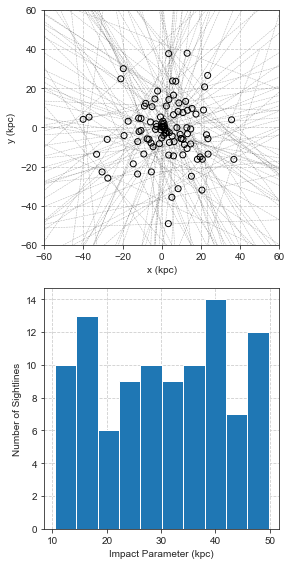

In [38]:
ray_data_file ='../../data/random_sightlines.dat' #centered at zero, not gcenter
impact_list, xi, yi, zi, xf, yf, zf =\
        np.loadtxt(ray_data_file, skiprows = 1, unpack = True, usecols = (1, 2, 3, 4, 5, 6, 7))

fig, ax = plt.subplots(ncols = 1, nrows = 2, figsize = (4, 8))
x = np.linspace(-150, 150, 800)
y = np.linspace(-150, 150, 800)

#cmap = palettable.cmocean.sequential.Gray_20_r.mpl_colormap
#ax.pcolormesh(x, y, data, norm = LogNorm(), cmap = cmap)
ax[0].set_aspect(1)
radius = 60
ax[0].set_xlim(-radius, radius)
ax[0].set_ylim(-radius, radius)
counter = 60
for ray_id in range(100):
    # x projection
#    mask = (ray_id_list == ray_id) & (ion_list == 'OVI') & (logN_list > 13.5) & (model_list == model)
#    if len(ovi_label_list[mask]) > 0:
    ray_start = np.array([xi[ray_id], yi[ray_id]])
    ray_end = np.array([xf[ray_id], yf[ray_id]])
    ray_center = ray_start + 0.5*(ray_end - ray_start)
    ax[0].scatter(ray_center[0], ray_center[1], color = 'None', edgecolor = 'black')
    ax[0].plot([xi[ray_id], xf[ray_id]], [yi[ray_id], yf[ray_id]], linewidth = 0.5, 
            linestyle = 'dashed', color = 'black', alpha = 0.3)
ax[0].set_xlabel('x (kpc)')
ax[0].set_ylabel('y (kpc)')

ax[1].hist(impact_list[:100])
ax[1].set_xlabel('Impact Parameter (kpc)')
ax[1].set_ylabel('Number of Sightlines')

fig.tight_layout()
plt.savefig('../../plots/sightline_description.png', dpi = 300)


In [ ]:
# next steps: calculate where along the sightline the OVI is > tahn some percent of it's final column density. 
#consider this where the absorption happened
# then, place scatter point at that point on the line along projected sightline
# not confirm orientation between sightlines on plot and in ray riles

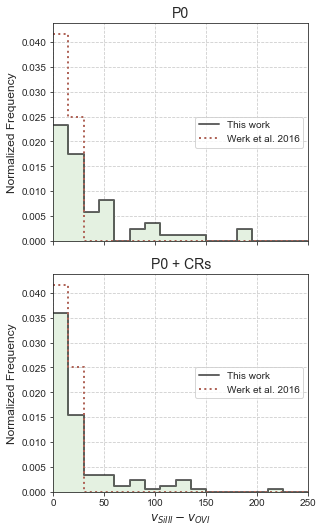

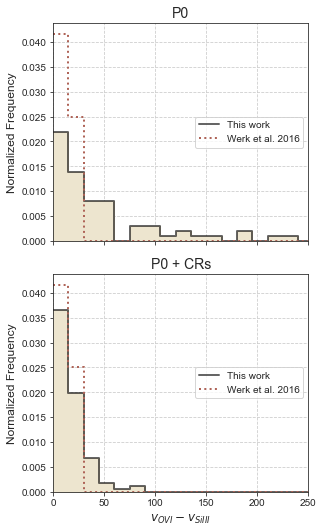

In [92]:
def normalized_bins(xbins, ybins):
    dx = xbins[1:] - xbins[0:-1]
    area = np.sum(dx * ybins[0:-1])
    return ybins / area
def digitize(data, bins):
    frequency, xbins = np.histogram(data, bins = bins)
    x = np.vstack((xbins[:-1], xbins[1:])).reshape((-1), order = 'F')
    y = np.vstack((frequency, frequency)).reshape((-1), order = 'F')
    normalized_y = normalized_bins(x, y)
    return x, normalized_y

def load_werk_data(ion, data_type):
    ion = ion.replace(' ', '')
    hdul = fits.open('../../data/OVIcomponents_withprofsANDCIV.fits')
    data = hdul[1].data
    if data_type == 'dvel':
        v_ovi = data['VCEN'] 
        v_si = data['SIIIIMATCH'][:, 4]
        si_flag = data['SIIIIMATCH'][:, 6]
        dvel = np.abs(v_ovi - v_si)
        dvel_err = np.zeros(len(dvel))
        mask = si_flag < 3
        return(dvel[mask], dvel_err[mask])
    
    if ion == 'OVI': # note: all OVI data is either detected or saturated.  no non-detections
        if data_type == 'col':
            return (data['NCOMP'], data['NCOMPERR'])
        elif data_type == 'bval':
            return (data['BVAL'], data['BVALERR'])
        elif data_type == 'vel':
            return (np.abs(data['VCEN']), data['VCENERR'])
    else:
        ion = '%sMATCH'%ion.upper()
        flag = data[ion][:, 6]
        mask = flag < 3
        if data_type == 'col':
            col = data[ion][:, 0]
            colerr = data[ion][:, 1]
            return col[mask], colerr[mask]
        elif data_type == 'bval':
            bval = data[ion][:, 2]
            bvalerr = data[ion][:, 3]
            return bval[mask], bvalerr[mask]
        elif data_type == 'vel':
            vel = np.abs(data[ion][:, 4])
            velerr = data[ion][:, 5]
            return vel[mask], velerr[mask]
        


def add_observations(ax, plot_type, bins = 20):
    model_colors = palettable.cartocolors.qualitative.Antique_3.mpl_colors
    
    if plot_type == 'col':
        # load savage data
        fn = '../../data/analyzed_spectra/savage_2014_ovi.dat'
        logN_savage = np.loadtxt(fn, unpack= True, skiprows = 1, usecols = 3, dtype = 'float')
        # plot savage data
        x_model, y_model = digitize(logN_savage, bins)
        ax.plot(x_model, y_model, linestyle = 'dashed', 
                    linewidth = lw, color = model_colors[0], label = 'Savage et al. 2014')
    
    if plot_type == 'bval':
        model_bins, data_savage, data_danforth, data_werk = np.loadtxt('../../data/analyzed_spectra/observed_ovi_bval.dat', 
                                                              unpack = True, comments = '#')
        ax.plot(model_bins, normalized_bins(model_bins, data_savage), linestyle = 'dashed', 
                linewidth = lw, color = model_colors[0], label = 'Savage et al. 2014')
        ax.plot(model_bins, normalized_bins(model_bins, data_danforth), linestyle = 'dashdot', 
              linewidth = lw, color = model_colors[1], label = 'Danforth et al. 2016')

        
def plot_histogram(ion_name, plot_type):
    ion = ion_name.replace(' ', '')
        
    csv_data_file = '../../data/analyzed_spectra/merged_solutions_with_kinematics.csv'
    ion_list, logN_list, logNerr_list, b_list, berr_list, vel_list, vel_err_list, ray_id_list,\
            model_list, impact_list, ovi_label_list, detection_list, align_list = pt.load_csv_data(csv_data_file)
    
    if ion == 'OVI':
        other_ion = 'SiIII'
    elif ion == 'SiIII':
        other_ion = 'OVI'
    dvel_list = pt.calculate_min_dvel(ion, other_ion)
    
    sim_data = {"col": logN_list, "bval":b_list, "vel":np.abs(vel_list), "dvel":dvel_list}
    xlabels = {"col": 'Log (%s Column Density (cm$^{-2}$))'%ion_name, "bval":"Doppler-b Parameter (km/s)", 
              "vel":"Velocity Offset (km/s)", "dvel":"$v_{%s} - v_{%s}$"%(ion, other_ion)}
    xlims = {"col":(11, 17), "bval":(0, 75), "vel":(0, 300), "dvel":(0, 250)}
    if ion == 'OVI':
        xlims["col"] = (12.5, 16)
        xlims['bval'] = (0, 175)
    bins = {"col":np.arange(11, 20, 0.5), "bval":np.arange(-16, 200, 16), "vel":np.arange(0, 360, 45), 
            "dvel":np.arange(0, 300, 15)}

    lw = 2
    if ion == 'OVI':
        fill_color = pt.get_palette('O VI')[0]
    else:
        fill_color = pt.get_palette('Si III')[0]
    model_colors = palettable.cartocolors.qualitative.Antique_3.mpl_colors

    impact_mask = (ray_id_list < 100) & (detection_list == 'detection')
    
    fig, ax = plt.subplots(nrows =2, ncols =1, figsize =(4.6, 7.5), sharey = True, sharex= True)

    for i, model in enumerate(['P0', 'P0agncr']):
        ion_mask = impact_mask & (model_list == model) & (ion_list == ion)
        x, normalized_y = digitize(sim_data[plot_type][ion_mask], bins[plot_type])
        ax[i].plot(x, normalized_y, color = 'black', linewidth = lw, alpha = 0.6, label = 'This work')
        ax[i].fill_between(x, 0, normalized_y, color = fill_color)


        # plot werk et al 2016 data
        x, normalized_y = digitize(load_werk_data(ion, plot_type)[0], bins[plot_type])
        ax[i].plot(x, normalized_y, linestyle = 'dotted', 
                  linewidth = lw, color = model_colors[2], label = 'Werk et al. 2016')                
        if ion == 'OVI':
            add_observations(ax[i], plot_type, bins = bins[plot_type])

        # adding labels
        ax[i].legend(loc = 7)

        ax[i].set_ylabel('Normalized Frequency', fontsize = 12)
        ax[i].set_xlim(xlims[plot_type][0], xlims[plot_type][1])


    # add text labels
    ylims = ax[0].get_ylim()
    ax[0].set_ylim(0, ylims[1])
    xtext = 0.7*(xlims[plot_type][1] - xlims[plot_type][0]) + xlims[plot_type][0]
    ytext = 0.85*(ylims[1] - ylims[0]) + ylims[0]
    #ax[0].text(xtext, ytext, 'P0', fontsize = 14, color = 'black')
    #ax[1].text(xtext, ytext, 'P0 + CRs', fontsize = 14, color = 'black')  
    ax[0].set_title('P0', fontsize = 14)
    ax[1].set_title('P0 + CRs', fontsize = 14)

    ax[1].set_xlabel(xlabels[plot_type], fontsize = 12)
    fig.tight_layout()
    plt.savefig('../../plots/%s_%s_histogram.png'%(ion, plot_type), dpi = 300)
    
plot_histogram('Si III', 'dvel')
plot_histogram('O VI', 'dvel')

<ipython-input-123-cc11e44a75ad>:37: RuntimeWarning: invalid value encountered in double_scalars
  cfrac = np.append(cfrac, total_si / total_sightlines)
<ipython-input-123-cc11e44a75ad>:37: RuntimeWarning: invalid value encountered in double_scalars
  cfrac = np.append(cfrac, total_si / total_sightlines)
<ipython-input-123-cc11e44a75ad>:37: RuntimeWarning: invalid value encountered in double_scalars
  cfrac = np.append(cfrac, total_si / total_sightlines)
<ipython-input-123-cc11e44a75ad>:37: RuntimeWarning: invalid value encountered in double_scalars
  cfrac = np.append(cfrac, total_si / total_sightlines)


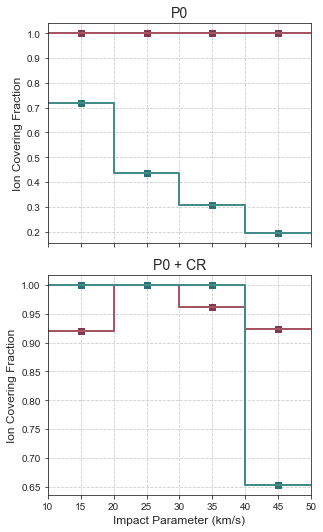

In [123]:
def ion_detection(model, ion):
    # covering fraction plot
    ion_list, logN_list, logNerr_list, b_list, berr_list, vel_list, \
        vel_err_list, ray_id_list, model_list, impact_list, ovi_label_list, detection_list, align_list\
        = pt.load_csv_data()
    
    new_impact_list = np.zeros(100)
    new_detect_list = np.zeros(100)
    for ray_id in range(100):
        mask = (model_list == model) & (ion_list == ion) & (ray_id_list == ray_id) & (detection_list == 'detection')
        impact = impact_list[ray_id_list == ray_id][0]
        new_impact_list[ray_id] = impact
        if len(ion_list[mask]) > 0:
            new_detect_list[ray_id] = 1
            
    return new_impact_list, new_detect_list

ion = 'OVI'
hdul = fits.open('../../data/OVIcomponents_withprofsANDCIV.fits')
werk_data = hdul[1].data
#werk_siIII
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize = (4.6, 7.5), sharex = True, sharey = False)
for i, model in enumerate(['P0', 'P0agncr']):
    for ion in ['OVI', 'SiIII']:
        impact_list, si_detect = ion_detection(model, ion)
        impact_bins = np.arange(10, 70, 10)
        xbins = np.array([])
        cfrac = np.array([])
        werk_cfrac= np.array([])
        for j in range(len(impact_bins) - 1):
            r_start = impact_bins[j]
            r_end = impact_bins[j+1]
            mask = (impact_list > r_start) & (impact_list < r_end)
            total_sightlines = len(impact_list[mask])
            total_si = np.sum(si_detect[mask])
            xbins = np.append(xbins, 0.5*(r_start+r_end))
            cfrac = np.append(cfrac, total_si / total_sightlines)
            
        x = np.vstack((impact_bins[:-1], impact_bins[1:])).reshape((-1), order = 'F')
        y = np.vstack((cfrac, cfrac)).reshape((-1), order = 'F')
        ax[i].scatter(xbins, cfrac, marker = 's', color = pt.get_palette(ion)[5])
        ax[i].plot(x, y, color = pt.get_palette(ion)[4], linewidth = 2, label = 'ion')
        ax[i].set_ylabel('Ion Covering Fraction', fontsize = 12)
    
#x[i].set_ylim(0, 1.2)
ax[0].set_xlim(10, 50)
ax[0].set_title('P0', fontsize = 14)
ax[1].set_title('P0 + CR', fontsize = 14)
ax[1].set_xlabel('Impact Parameter (km/s)', fontsize = 12)

fig.tight_layout()
plt.savefig('../../plots/covering_fraction.png', dpi = 300)
   


In [329]:
csv_data_file = '../../data/analyzed_spectra/merged_solutions_with_kinematics.csv'
ion_list, logN_list, logNerr_list, b_list, berr_list, vel_list, \
        vel_err_list, ray_id_list, model_list, impact_list, ovi_label_list, detection_list, align_list\
        = pt.load_csv_data(csv_data_file)

model = 'P0agncr'
ion = 'SiIV'


for ray_id in range(100):
    mask = (ray_id_list == ray_id) & (ion_list == 'OVI') 
    mask1 = mask & (model_list == 'P0')
    mask2 = mask & (model_list == 'P0agncr')
    bmask = mask1 & (b_list > 40)
    print(ray_id_list[bmask], b_list[bmask], align_list[bmask])
#    print(ray_id, ovi_label_list[mask1], logN_list[mask1], b_list[mask1], '\n',
 #             ovi_label_list[mask2], logN_list[mask2], b_list[mask2])

#plt.scatter(impact_list[mask], logN_list[mask])

[] [] []
[] [] []
[2] [55.2288415] [1]
[] [] []
[4] [45.4546843] [1]
[] [] []
[] [] []
[] [] []
[8] [45.20579433] [0]
[] [] []
[] [] []
[] [] []
[12] [41.43513257] [0]
[] [] []
[14] [41.25233535] [0]
[15] [49.78125138] [1]
[16] [42.36383077] [0]
[] [] []
[] [] []
[] [] []
[20] [44.92707948] [0]
[] [] []
[] [] []
[] [] []
[] [] []
[25] [44.00313443] [0]
[] [] []
[27] [42.47054278] [0]
[] [] []
[] [] []
[] [] []
[31] [43.53678258] [0]
[] [] []
[] [] []
[34] [42.60659656] [0]
[35] [41.38262721] [1]
[] [] []
[] [] []
[] [] []
[39] [51.36066698] [1]
[40] [42.84611439] [1]
[] [] []
[42] [40.10780571] [0]
[] [] []
[44 44] [47.10683669 43.14422079] [0 1]
[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[51] [46.89355748] [0]
[] [] []
[] [] []
[] [] []
[] [] []
[56] [42.01180019] [1]
[] [] []
[] [] []
[] [] []
[] [] []
[61] [49.14208517] [0]
[] [] []
[63] [62.41638973] [0]
[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[] [] []
[72] [45.40702849] [0]
[73] [59.86573504] [0]


In [ ]:
# idea add simulation data to plots in figure 6
# or: make 2d histobram of log O VI vs gas velocity magnitude

4.427612903225807


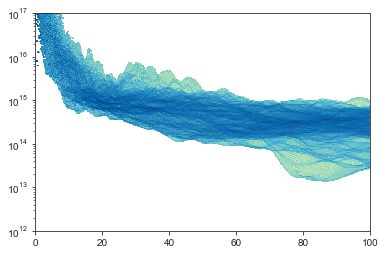

In [4]:
sim = 'P0'
#cdens_file = h5.File('../../data/simulated_ion_column_densities_%s.h5'%(sim), 'r')
ion = 'OVI'
fn = '../../data/simulated_ion_column_densities_%s.h5'%(sim)
r_arr, cdens_arr = ipd.load_r_cdens(fn, ion)
fig, ax = plt.subplots()
rmax = 100
ylims = (1e12, 1e17)
im =  ipd.plot_hist2d(ax, r_arr, cdens_arr, rmax,  ylims, vmin = 1e-3)



3.8976


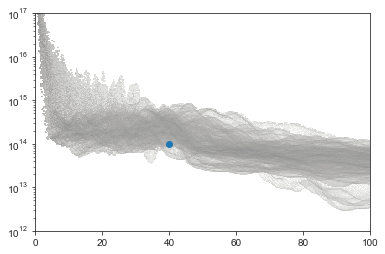

In [24]:
sim = 'P0_agncr'
#cdens_file = h5.File('../../data/simulated_ion_column_densities_%s.h5'%(sim), 'r')
ion = 'OVI'
fn = '../../data/simulated_ion_column_densities_%s.h5'%(sim)
r_arr, cdens_arr = ipd.load_r_cdens(fn, ion)
fig, ax = plt.subplots()
rmax = 100
ylims = (1e12, 1e17)
cmap = palettable.cmocean.sequential.Gray_18_r.mpl_colormap
im =  ipd.plot_hist2d(ax, r_arr, cdens_arr, rmax, ylims, vmin = 1e-2, vmax = 1e5, cmap = cmap)

ax.scatter(40, 1e14)

4.801569653368215


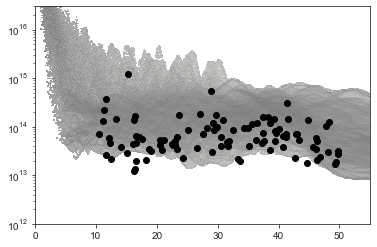

In [54]:
ion = 'OVI'
model = 'P0_agncr'
fn = '../../data/simulated_ion_column_densities_%s.h5'%(model)
r_arr, cdens_arr = ipd.load_r_cdens(fn, ion)

rmax = 55
ylims = (1e12, 3e16)
cmap = palettable.cmocean.sequential.Gray_18_r.mpl_colormap

fig, ax = plt.subplots()
im =  ipd.plot_hist2d(ax, r_arr, cdens_arr, rmax, ylims, vmin = 1e-3, vmax = 1e5, cmap = cmap)

for i in range(100):
    impact, sicol, ocol = load_sightline_data(model, i)
    ax.scatter(impact, np.power(10, ocol), color = 'black')

27.27952910398954


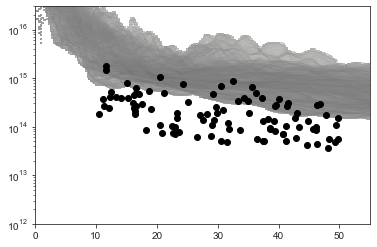

In [74]:
def plot_hist2d(ax, r_arr, cdens_arr, rmax,  ylims, cmap='GnBu', vmin=1, vmax=None):
    nbins = 200
    xbins = np.linspace(0, rmax, nbins)
    ybins = np.logspace(np.log10(ylims[0]), np.log10(ylims[1]), nbins)
    counts, x_edge, y_edge = np.histogram2d(r_arr, cdens_arr, bins=(xbins, ybins))
    x_bin_center = ((x_edge[1:] + x_edge[:-1]) / 2).reshape(nbins-1,1)
    # normalize counts in x-space to remove out linear increase in counts with                                                                                   
    # radius due to circles of constant impact parameter                                                                                                         
    counts /= x_bin_center
    ax.set_yscale('log')
    #im = ax.pcolormesh(xbins, ybins, counts.T, vmin=counts.min(), vmax=counts.max(), cmap='magma', norm=LogNorm())                                              
    print(counts.max())
    if vmax == None:
        vmax = counts.max()
    im = ax.pcolormesh(xbins, ybins, counts.T, vmin=vmin, vmax=vmax, cmap=cmap, norm=LogNorm())
    return im

def load_r_cdens(fname, ion, underscore = False):
    r_arr = []
    cdens_arr = []

    frb = h5.File(fname, 'r')
    for axis in ['x', 'y', 'z']:
        cname = "%s_%s"%(ion.replace(" ", ""), axis)
        if cname in frb.keys():
            r_arr = np.concatenate((r_arr, frb['radius'][:]))
            cdens_arr = np.concatenate((cdens_arr, frb[cname][:]))
    return r_arr, cdens_arr

ion = 'OVI'
model = 'P0'
fn = '../../data/simulated_ion_column_densities_%s.h5'%(model)
fn = '../analysis/test.h5'
r_arr, cdens_arr = load_r_cdens(fn, ion)

rmax = 55
ylims = (1e12, 3e16)
cmap = palettable.cmocean.sequential.Gray_18_r.mpl_colormap

fig, ax = plt.subplots()
im =  plot_hist2d(ax, r_arr, cdens_arr, rmax, ylims, vmin = 1e-3, vmax = 1e6, cmap = cmap)


for i in range(100):
    impact, sicol, ocol = load_sightline_data(model, i)
    ax.scatter(impact, np.power(10, ocol), color = 'black')
    
#plt.savefig("ovi_col_test_depth_110_%s.png"%model)
plt.savefig("ovi_col_test_fullbox_%s.png"%model)
  #  l, temperature, density, metallicity, vlos, ocol, sicol = \
  #      pt.load_sightline_scatter_data(model, i)


   # sim_ovi_col = np.sum(ocol)
   # sim_si_col = np.sum(sicol)

    #ax.scatter(impact, sim_ovi_col, color = 'orange')
    
    

In [56]:
l, temperature, density, metallicity, vlos, ocol, sicol = \
    pt.load_sightline_scatter_data(model, i)
l -= 250

sim_ovi_col = np.sum(ocol)
sim_si_col = np.sum(sicol)

In [57]:
sim_si_col

37193826.255327076

yt : [INFO     ] 2021-04-02 22:33:07,834 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-04-02 22:33:07,836 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-04-02 22:33:07,837 Parameters: domain_left_edge          = [-0.5 -0.5 -0.5]
yt : [INFO     ] 2021-04-02 22:33:07,837 Parameters: domain_right_edge         = [0.5 0.5 0.5]
yt : [INFO     ] 2021-04-02 22:33:07,838 Parameters: cosmological_simulation   = 1.0
yt : [INFO     ] 2021-04-02 22:33:07,839 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-04-02 22:33:07,839 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-02 22:33:07,840 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-02 22:33:07,841 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-02 22:33:07,842 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-02 22:33:07,859 Allocating for 3.151e+07 p


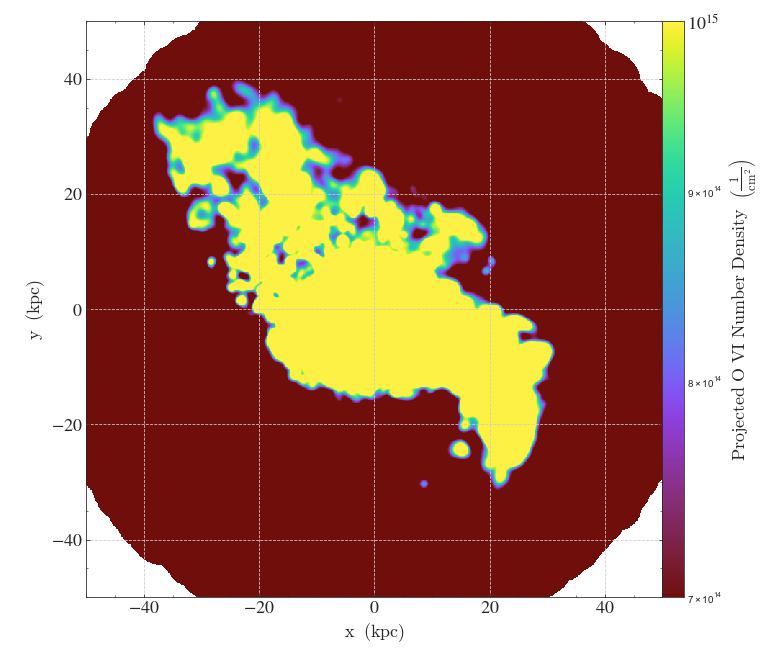

In [244]:
sim = 'P0'
ds, center, bv = spg.load_simulation_properties(sim)
def make_projection(ds, axis, ion_fields, center, width):
    half_width = np.array([width, width, width]) / 2.
    left_edge = center - YTArray(half_width, 'kpc')
    right_edge = center + YTArray(half_width, 'kpc')
    box = ds.region(center, left_edge, right_edge)
    box = ds.sphere(center, (50, 'kpc'))
    proj = yt.ProjectionPlot(ds, axis, ion_fields, weight_field = None, width=width, center = center, 
        data_source = box, method = 'integrate')
    proj.set_zlim('O_p5_number_density', 7e14, 1e15)
    proj.show()
    return proj.data_source.to_frb((width, 'kpc'), 800)


width = YTQuantity(100, 'kpc')
proj_data = make_projection(ds, 'z', ('O_p5_number_density'), center, width)

In [259]:
res = 800
print(width)
extent = 0.5*width - 0.5* width / res
px, py = np.mgrid[-extent:extent:res*1j, -extent:extent:res*1j]
#np.mgrid[-width/2:width/2:res*1j, -width/2:width/2:res*1j]
radius = (px**2.0 + py**2.0)**0.5

100 kpc


In [261]:
radius

array([[70.62228977, 70.5339568 , 70.44573488, ..., 70.44573488,
        70.5339568 , 70.62228977],
       [70.5339568 , 70.44551308, 70.35718025, ..., 70.35718025,
        70.44551308, 70.5339568 ],
       [70.44573488, 70.35718025, 70.26873638, ..., 70.26873638,
        70.35718025, 70.44573488],
       ...,
       [70.44573488, 70.35718025, 70.26873638, ..., 70.26873638,
        70.35718025, 70.44573488],
       [70.5339568 , 70.44551308, 70.35718025, ..., 70.35718025,
        70.44551308, 70.5339568 ],
       [70.62228977, 70.5339568 , 70.44573488, ..., 70.44573488,
        70.5339568 , 70.62228977]])

26.449811320754716


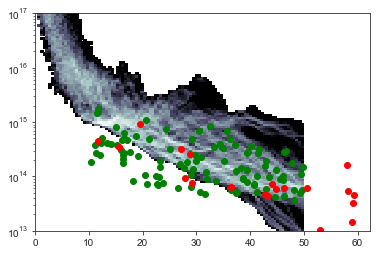

In [265]:
def plot_hist2d(ax, r_arr, cdens_arr, rmax,  ylims, cmap='GnBu', vmin=1, vmax=None):
    nbins = 100
    xbins = np.linspace(0, rmax, nbins)
    ybins = np.logspace(np.log10(ylims[0]), np.log10(ylims[1]), nbins)
    counts, x_edge, y_edge = np.histogram2d(r_arr, cdens_arr, bins=(xbins, ybins))
    x_bin_center = ((x_edge[1:] + x_edge[:-1]) / 2).reshape(nbins-1,1)
    # normalize counts in x-space to remove out linear increase in counts with                                                                                   
    # radius due to circles of constant impact parameter                                                                                                         
    counts /= x_bin_center
    ax.set_yscale('log')
    #im = ax.pcolormesh(xbins, ybins, counts.T, vmin=counts.min(), vmax=counts.max(), cmap='magma', norm=LogNorm())                                              
    print(counts.max())
    if vmax == None:
        vmax = counts.max()
        
    # trying sktech things   
  #  dx = xbins[1] - xbins[0]
  ##  xbins -= dx
    #dy = ybins[1] - ybins[0]
    #ybins -= dy
    im = ax.pcolormesh(xbins, ybins, counts.T, vmin=vmin, vmax=vmax, cmap=cmap, norm=LogNorm())
    return im

fig, ax = plt.subplots()
r_arr = radius.ravel()
cdens_arr = proj_data[field].ravel()
im = plot_hist2d(ax, r_arr, cdens_arr, rmax = 50, ylims = (1e13, 1e17), cmap = 'bone')
for i in range(100):
    impact, sicol, ocol = load_sightline_data(sim, i)
    #if impact < 15 and ocol < 15:
    #    print(i, impact, ocol)
    ax.scatter(impact, np.power(10, ocol), color = 'green')
#ax.scatter(impact_list, ocol_list, color = 'blue')
ax.scatter(impact_list_2, ocol_list_2, color = 'red')

In [122]:
#testing sightline 51
ray_id = 51
sim = 'P0'
fn = '../../data/unanalyzed_spectra/ray_%s_%i_%i.h5'%(sim, 3195, ray_id)
plot_data = h5.File(fn, 'r')['grid']

l = YTArray(plot_data['l'], 'cm')
l = np.array(l.in_units('kpc'))

x = YTArray(plot_data['x'], 'cm').in_units('kpc') - center[0]
y = YTArray(plot_data['y'], 'cm').in_units('kpc') - center[1]
z = YTArray(plot_data['z'], 'cm').in_units('kpc') - center[2]
dist_to_center = np.sqrt(x**2 + y**2 + z**2)

ocol = np.array(plot_data['dl'])*np.array(plot_data['O_p5_number_density'])

In [102]:
l

array([-23.25209326, -22.86322147, -21.40296957, ..., 513.00799341,
       515.0358861 , 515.25154381])

In [103]:
plot_data.keys()

<KeysViewHDF5 ['H_nuclei_density', 'H_p0_number_density', 'Mg_p1_number_density', 'N_p4_number_density', 'O_p5_number_density', 'Si_p1_number_density', 'Si_p2_number_density', 'Si_p3_number_density', 'density', 'dl', 'l', 'metallicity', 'redshift', 'redshift_dopp', 'redshift_eff', 'relative_velocity_x', 'relative_velocity_y', 'relative_velocity_z', 'temperature', 'velocity_los', 'velocity_x', 'velocity_y', 'velocity_z', 'x', 'y', 'z']>

In [116]:
x = YTArray(plot_data['x'], 'cm').in_units('kpc') - center[0]
y = YTArray(plot_data['y'], 'cm').in_units('kpc') - center[1]
z = YTArray(plot_data['z'], 'cm').in_units('kpc') - center[2]
dist_to_center = np.sqrt(x**2 + y**2 + z**2)

(-50.0, 50.0)

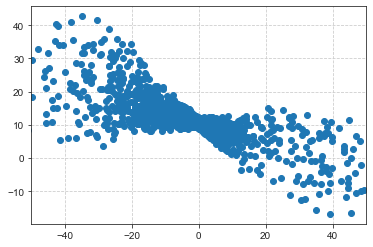

In [150]:
#plt.scatter(x, y)
plt.scatter(y, z)
#plt.scatter(z, x)
plt.xlim(-50, 50)

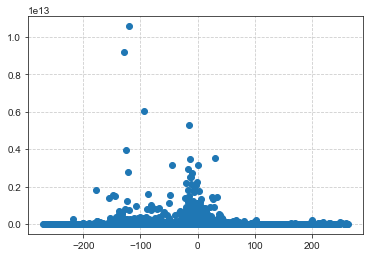

In [140]:
plt.scatter(x, ocol)
#plt.ylim(0, 50)

In [126]:
print("%e"%np.sum(ocol))

2.009170e+14


In [128]:
np.mean(dist_to_center[np.abs(x < 20)])

unyt_quantity(72.53982252, 'kpc')

(-140.0, -110.0)

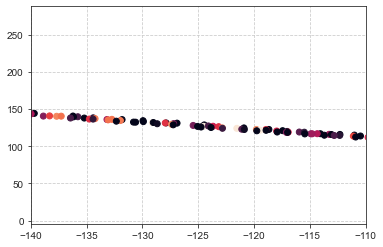

In [143]:
plt.scatter(x, dist_to_center, c = ocol, norm = LogNorm(), vmin = 1e10, vmax = 3e12)
plt.xlim(-140, -110)
#plt.ylim(0, 20)

yt : [INFO     ] 2021-04-02 22:23:00,735 xlim = -16958.773177 -16908.773177
yt : [INFO     ] 2021-04-02 22:23:00,737 ylim = -12034.281446 -11984.281446
yt : [INFO     ] 2021-04-02 22:23:00,739 xlim = -0.423900 -0.422650
yt : [INFO     ] 2021-04-02 22:23:00,740 ylim = -0.300808 -0.299558
yt : [INFO     ] 2021-04-02 22:23:00,749 Making a fixed resolution buffer of (('gas', 'O_p5_number_density')) 800 by 800



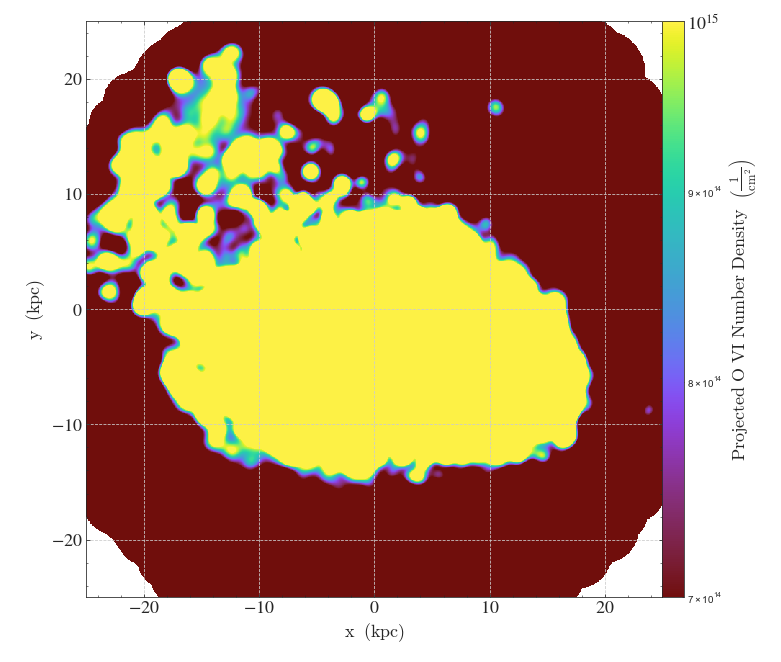

In [215]:
ray_center = YTArray(center.d - [10, 10, 0], 'kpc')
ray_start = YTArray(center.d + [0, 0, 250], 'kpc')  #YTArray([-1.718017e+04, -1.204668e+04, 5.327571e+03], 'kpc')
ray_end = YTArray(center.d - [0, 0, 250], 'kpc')#YTArray([-1.668635e+04, -1.197200e+04, 5.303792e+03], 'kpc')

width = (50, 'kpc')
depth = YTArray([25, 25, 500], 'kpc')
left_edge = center - depth
right_edge = center + depth
#left_edge = center - YTArray(half_width, 'kpc')
#right_edge = center + YTArray(half_width, 'kpc')
box = ds.region(ray_center, left_edge, right_edge)

sphere = ds.sphere(center, (25, 'kpc'))
p = yt.ProjectionPlot(ds, 'z', field, width = width, center = center, weight_field = None, data_source = sphere)
p.set_zlim(field, 7e14, 1e15)
#p.set_buff_size(1600)
p.show()


In [249]:
ad = ds.all_data()
ad.set_field_parameter('bulk_velocity', bv)
ad.set_field_parameter('center', center)

#impact_list_2 = []
#ocol_list_2 = []


for i in range(10):
    random_impact = 40*np.random.random() + 10
    random_theta = 2*np.pi * np.random.random() # in the x-y plane
    ray_x = random_impact*np.cos(random_theta)
    ray_y = random_impact*np.sin(random_theta)
    
    ray_start = ds.arr(center.d + [ray_x, ray_y, -250], 'kpc')
    ray_end = ds.arr(center.d + [ray_x, ray_y, 250], 'kpc')

    ray = trident.make_simple_ray(ds,
                            start_position = ray_start,
                            end_position = ray_end,
                            lines=['O VI'],
                            ftype='gas',
                            fields= ['temperature', 'density', 'metallicity', 'velocity_x', 'velocity_y', 'velocity_z'],
                            field_parameters=ad.field_parameters,
                            # the current redshift of the simulation, calculated above, rounded to two decimal places                                      
                            redshift=0.25)
    ray_data = ray.all_data()
    dl = ray_data['dl']
    ocol = np.sum(dl * ray_data['O_p5_number_density'])
    impact_list_2.append(random_impact)
    ocol_list_2.append(ocol)

yt : [WARNING  ] 2021-04-02 22:39:05,382 Generating light ray with different redshift than the dataset itself.
yt : [INFO     ] 2021-04-02 22:39:05,408 Getting segment at z = 0.25: [-0.42284852 -0.29963057  0.12636062] unitary to [-0.42284852 -0.29963057  0.13885857] unitary.
/Users/irynabutsky/software/miniconda3/lib/python3.8/site-packages/unyt/array.py:1778: RuntimeWarning: invalid value encountered in true_divide
  out_arr = func(
yt : [INFO     ] 2021-04-02 22:39:05,410 Getting subsegment: [unyt_quantity(-0.42284852, 'unitary'), unyt_quantity(-0.29963057, 'unitary'), unyt_quantity(0.12636062, 'unitary')] to [unyt_quantity(-0.42284852, 'unitary'), unyt_quantity(-0.29963057, 'unitary'), unyt_quantity(0.13885857, 'unitary')].
yt : [INFO     ] 2021-04-02 22:39:07,525 Saving field data to yt dataset: ray.h5.
yt : [INFO     ] 2021-04-02 22:39:07,603 Parameters: current_time              = 3.3988696927205075e+17 s
yt : [INFO     ] 2021-04-02 22:39:07,604 Parameters: domain_dimensions    

yt : [INFO     ] 2021-04-02 22:39:20,244 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-02 22:39:20,244 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-02 22:39:20,245 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-02 22:39:20,268 Allocating for 1.494e+03 particles
yt : [WARNING  ] 2021-04-02 22:39:20,767 Generating light ray with different redshift than the dataset itself.
yt : [INFO     ] 2021-04-02 22:39:20,785 Getting segment at z = 0.25: [-0.42216145 -0.29921558  0.12636062] unitary to [-0.42216145 -0.29921558  0.13885857] unitary.
yt : [INFO     ] 2021-04-02 22:39:20,787 Getting subsegment: [unyt_quantity(-0.42216145, 'unitary'), unyt_quantity(-0.29921558, 'unitary'), unyt_quantity(0.12636062, 'unitary')] to [unyt_quantity(-0.42216145, 'unitary'), unyt_quantity(-0.29921558, 'unitary'), unyt_quantity(0.13885857, 'unitary')].
yt : [INFO     ] 2021-04-02 22:39:22,278 Saving field data to yt dataset: ra

yt : [INFO     ] 2021-04-02 22:39:34,176 Parameters: current_redshift          = 0.2497948824964893
yt : [INFO     ] 2021-04-02 22:39:34,176 Parameters: omega_lambda              = 0.6914
yt : [INFO     ] 2021-04-02 22:39:34,177 Parameters: omega_matter              = 0.3086
yt : [INFO     ] 2021-04-02 22:39:34,177 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-04-02 22:39:34,178 Parameters: hubble_constant           = 0.677583430663222
yt : [INFO     ] 2021-04-02 22:39:34,202 Allocating for 9.520e+02 particles


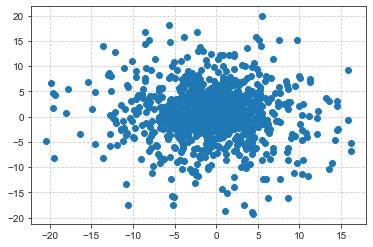

In [197]:
plt.scatter(ray_data['x'].in_units('kpc') - center[0], ray_data['y'].in_units('kpc')-center[1])

18.175052854122622


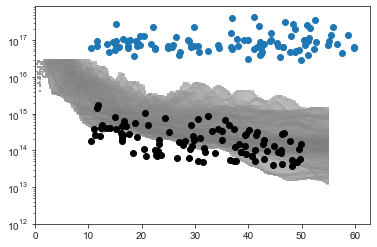

In [181]:



ion = 'OVI'
model = 'P0'
fn = '../../data/simulated_ion_column_densities_%s.h5'%(model)
#fn = '../analysis/test.h5'
r_arr, cdens_arr = load_r_cdens(fn, ion)

rmax = 55
ylims = (1e12, 3e16)
cmap = palettable.cmocean.sequential.Gray_18_r.mpl_colormap

fig, ax = plt.subplots()
im =  plot_hist2d(ax, r_arr, cdens_arr, rmax, ylims, vmin = 1e-3, vmax = 1e6, cmap = cmap)


for i in range(100):
    impact, sicol, ocol = load_sightline_data(model, i)
    ax.scatter(impact, np.power(10, ocol), color = 'black')

ax.scatter(impact_list, ocol_list)
    
#plt.savefig("ovi_col_test_depth_110_%s.png"%model)
#plt.savefig("ovi_col_test_fullbox_%s.png"%model)
  #  l, temperature, density, metallicity, vlos, ocol, sicol = \
  #      pt.load_sightline_scatter_data(model, i)


   # sim_ovi_col = np.sum(ocol)
   # sim_si_col = np.sum(sicol)

    #ax.scatter(impact, sim_ovi_col, color = 'orange')
    
    

NameError: name 'ds' is not defined